In [327]:
#Gerekli Kütphanelerin import edilmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [328]:
data=pd.read_csv("car_data.csv")
data.head()
#Gender=Cinsiyet
#Age=Yaş
#AnnualSalary=Müşterilerin Yıllık Maaşı
#Satın Alma,1=Evet,0=Hayır

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [329]:
data.isna().sum()#Verimizde boş değer olup olmadığını hesaplıyoruz

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

<AxesSubplot:>

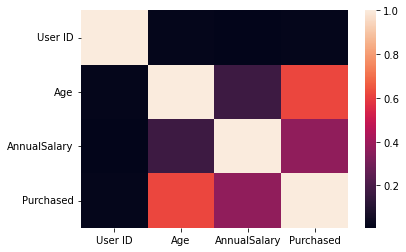

In [330]:
sns.heatmap(data.corr())#Verimizdeki değerler arasındaki uyuşma değerleri

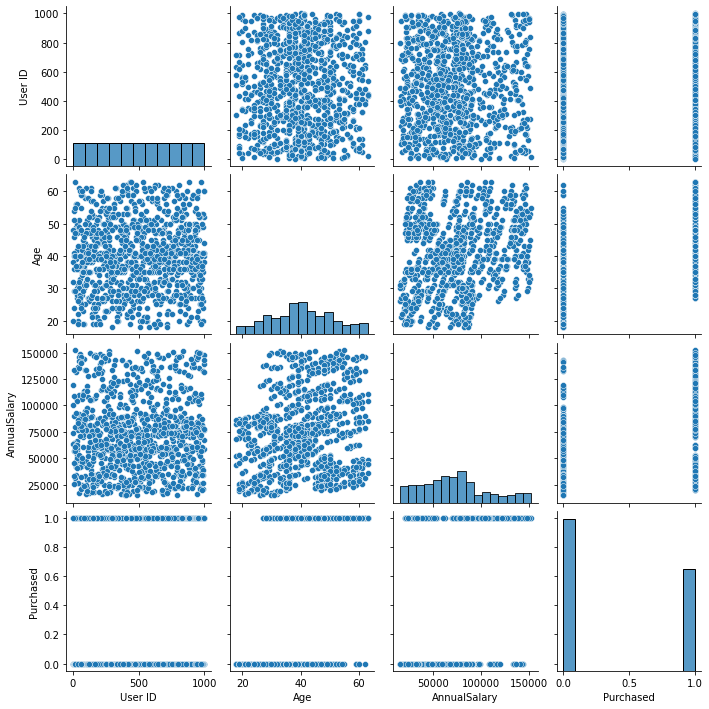

In [331]:
sns.pairplot(data)#Verimizde değerler arasındaki ilişkiyi grafik şeklinde gösterir

In [332]:
#Verimizde 'User ID' olması, modelimizin ezberlemesine sebep olacağından verimizden kaldırdım
data.head()
data.drop("User ID",axis=1,inplace=True)

In [333]:
#Verimizdeki Cinsiyet değerini modelin anlayacağı şekilde sayısal değerlere dönüştürdük 
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

Gender=pd.DataFrame(le.fit_transform(data["Gender"]),columns=["gender"])
data.drop("Gender",axis=1,inplace=True)
data=pd.concat([data,Gender],axis=1)
data.head()

,Age,AnnualSalary,Purchased,gender
0,35,20000,0,1
1,40,43500,0,1
2,49,74000,0,1
3,40,107500,1,1
4,25,79000,0,1


In [334]:

x=pd.DataFrame(data.drop("Purchased",axis=1))#Bağımsız Değişken
y=pd.DataFrame(data["Purchased"])#Bağımlı Değişken

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)#Eğitim ve Test Kümelerinin Hazırlanması

#Verinin Standarilize Edilmesi
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)#x_train'i öğren ve çevir
x_test=sc.transform(x_test)#x_test'i sadece çevir

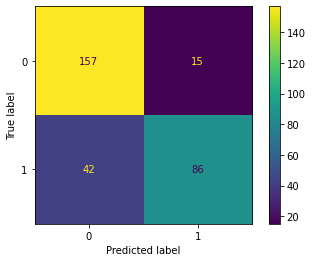

In [335]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train.values.ravel())
y_pred=lr.predict(x_test)

#Hata Ayıklama
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

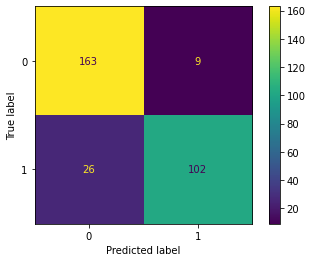

In [336]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=8)
rf.fit(x_train,y_train.values.ravel())
y_pred=rf.predict(x_test)

#Hata Ayıklama
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

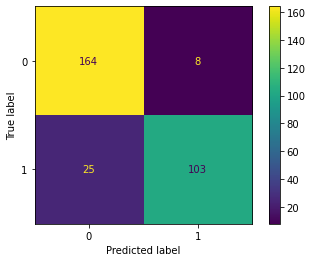

In [337]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion="entropy")
dc.fit(x_train,y_train)
y_pred=dc.predict(x_test)

#Hata Ayıklama
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

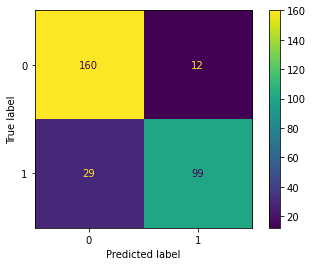

In [338]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train.values.ravel())
y_pred=gnb.predict(x_test)

#Hata Ayıklama
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

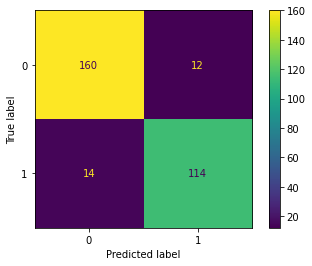

In [339]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski")
knn.fit(x_train,y_train.values.ravel())
y_pred=knn.predict(x_test)

#Hata Ayıklama
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

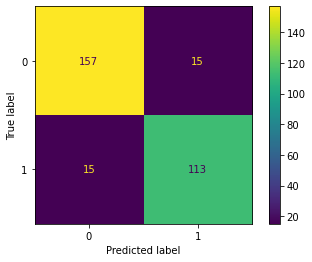

In [340]:
#Support Vector Machine
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train.values.ravel())
y_pred=svc.predict(x_test)

#Hata Ayıklama
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()